# Decision Tree - Restaurant DataSet



OBJETIVO:  Mostrar a árvore gerada, a matriz de confusão, as métricas do modelo, e as regras geradas com as respectivas coberturas. 

In [332]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [317]:
# Ler dados do DataSet
csv_dir = "/content/sample_data/restaurantev2.csv"
data = pd.read_csv(csv_dir, delimiter=";")

Mostrando a tabela que foi lida do Dataset restaurante, e tratar os dados.

In [318]:
data

,Exemplo,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,X1,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,x2,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,x3,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,x4,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,out/30,Sim
4,X5,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,X6,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,X7,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,X8,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,X9,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,X10,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,out/30,Não


O tratamento de dados do Dataset foi feito da seguinte forma:
- Armazenando em uma variável a coluna de classificação.
- Armazenando em uma variável as colunas necessarias para o treinamento.

In [319]:
classification_col = data['conc']
treinamento = data[['Alternativo', 'Bar', 'Sex/Sab', 'fome', 'Cliente', 'Preço', 'Chuva', 'Res', 'Tipo', 'Tempo']]

Mostrando a coluna tratada de classificação.

In [320]:
classification_col

0     Sim
1     Não
2     Sim
3     Sim
4     Não
5     Sim
6     Não
7     Sim
8     Não
9     Não
10    Não
11    Sim
Name: conc, dtype: object

Mostrando as colunas retiradas da tabela `data`, usadas para treinar a IA.

In [321]:
treinamento

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,out/30
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,out/30


Transformar as colunas de treinamento em valores números para poder fazer a classificação:
- transformar todas as colunas em variáveis categóricas.  utilizando a biblioteca de pré-processamento do Scikit-Learn. 
- Transformar em valores numéricos, usando o LabelEncoder.
- transformar em valores de ponto flutuante.

In [322]:
def transformaNumerico(tabela_treinamento):
  for column in tabela_treinamento:
    tabela_treinamento[column] = tabela_treinamento[column].astype(str)
    le = preprocessing.LabelEncoder()
    tabela_treinamento[column] = le.fit_transform(tabela_treinamento[column])
  tabela_treinamento = tabela_treinamento.astype(float)
  return tabela_treinamento

In [ ]:
# Pegar a tabela de treinamento em formato númerico
treinamento = transformaNumerico(treinamento)

Treinar a árvore de decisão de classificação:
- Passar o critério de entropia a ser utilizado no cálculo de ganho dos atributos.
- Utilizar a árvore criada e passar por parâmetros no `.fit()` os dataset a serem usados para treinamento e classificação, respectivamente.

In [324]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_restaurant = DecisionTreeClassifier(criterion="entropy")
tree_train = tree_restaurant.fit(treinamento, classification_col)

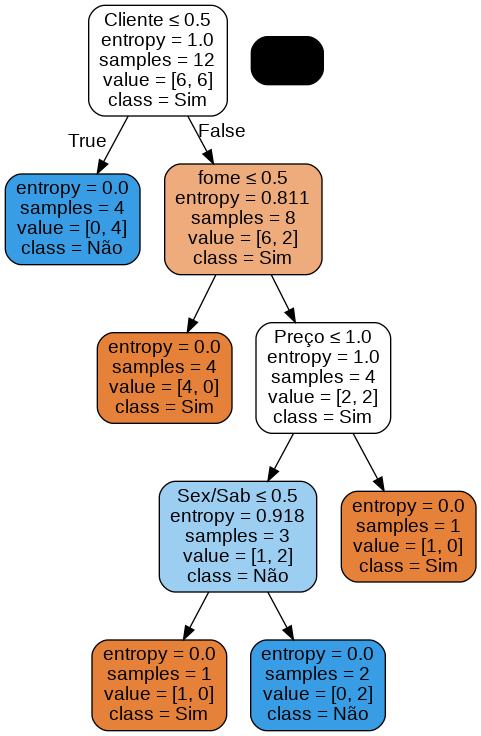

In [325]:
dot_data = tree.export_graphviz(tree_train, out_file=None,
                                feature_names=treinamento.columns.values,
                                class_names=classification_col.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tree_restaurant.png')

from IPython.display import Image
Image(filename='tree_restaurant.png')

Após criar a árvore deve ser mostrado ao usuário:
- Matriz de confusão.
- Métricas do modelo

In [326]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [327]:
# Pegar tabela de dados FAKES
csv_dir_fake = "/content/sample_data/fakerestaurant.csv"
data_fake = pd.read_csv(csv_dir_fake, delimiter=";")

classification_col_fake = data_fake['conc']
fake_treinamento = data_fake[['Alternativo', 'Bar', 'Sex/Sab', 'fome', 'Cliente', 'Preço', 'Chuva', 'Res', 'Tipo', 'Tempo']]

In [ ]:
# Transformar o treinamento fake em dados númericos
fake_treinamento = transformaNumerico(fake_treinamento)

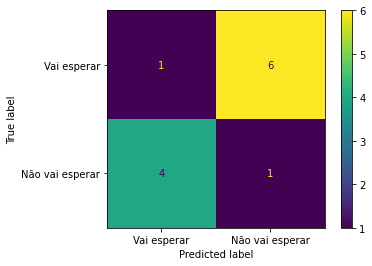

In [329]:
conf_matrix = confusion_matrix(classification_col_fake, tree_train.predict(fake_treinamento))
labels = ["Vai esperar", "Não vai esperar"]
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
cmd.plot(values_format="d")
plt.show()

In [330]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [331]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(classification_col_fake, tree_train.predict(fake_treinamento)))
print('\n')
print(classification_report(classification_col_fake, tree_train.predict(fake_treinamento), target_names=labels))
print('\n')

tn, fp, fn, tp = confusion_matrix(classification_col_fake, tree_train.predict(fake_treinamento)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))


Accuracy score =  0.16666666666666666


                 precision    recall  f1-score   support

    Vai esperar       0.20      0.14      0.17         7
Não vai esperar       0.14      0.20      0.17         5

       accuracy                           0.17        12
      macro avg       0.17      0.17      0.17        12
   weighted avg       0.18      0.17      0.17        12



True negative rate: 0.14285714285714285
False positive rate: 0.8571428571428571
False negative rate: 0.8
True positive rate: 0.2
